https://machinelearningspace.com/coco-dataset-a-step-by-step-guide-to-loading-and-visualizing/

In [2]:
from collections import defaultdict
import json
import numpy as np

In [3]:
# define the cocoParser() class with five methods as follows.
class COCOParser:

    def __init__(self, anns_file, imgs_dir):
        
        with open(anns_file, 'r') as f: # reads the annotation JSON file using json library and stored in the coco variable
            coco = json.load(f)
        
        self.annIm_dict = defaultdict(list) # a defaultdict that associates an image ID with a list of annotations
        self.cat_dict = {} # a dictionary that maps a category ID to the corresponding category information
        self.annId_dict = {} # a dictionary that connects an annotation ID to the corresponding annotation information
        self.im_dict = {} # a dictionary that links an image ID to the corresponding image information
        self.licenses_dict = {} # a dictionary that associates a license ID with the corresponding license information
        
        for ann in coco['annotations']:           
            self.annIm_dict[ann['image_id']].append(ann) 
            self.annId_dict[ann['id']]=ann
        for img in coco['images']:
            self.im_dict[img['id']] = img
        for cat in coco['categories']:
            self.cat_dict[cat['id']] = cat
        for license in coco['licenses']:
            self.licenses_dict[license['id']] = license
    
    def get_imgIds(self):
        """
        returns a list of all image IDs stored in the self.im_dict dictionary, 
        which links image IDs to their corresponding image information
        """
        return list(self.im_dict.keys())
    
    def get_annIds(self, im_ids):
        """
        takes im_ids, which is a list of image IDs, as an input parameter and returns the list of annotation IDs.
        """
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        return [ann['id'] for im_id in im_ids for ann in self.annIm_dict[im_id]]
    
    def load_anns(self, ann_ids):
        """
        retrieve information associated with a given list of annotation IDs as the input parameter.
        """
        im_ids=ann_ids if isinstance(ann_ids, list) else [ann_ids]
        return [self.annId_dict[ann_id] for ann_id in im_ids]        
    
    def load_categories(self, class_ids):
        """
        accepts a parameter class_ids, which may be either a single class ID or a list of class IDs, 
        and returns the list of categories associated with the given class_ids
        """
        class_ids=class_ids if isinstance(class_ids, list) else [class_ids]
        return [self.cat_dict[class_id] for class_id in class_ids]
    
    def get_imgLicenses(self,im_ids):
        """
        receives a parameter im_ids, which can either be a single image ID or a list of image IDs,
        and returns a list of licenses corresponding to each image ID in the list im_ids.
        """
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        lic_ids = [self.im_dict[im_id]["license"] for im_id in im_ids]
        return [self.licenses_dict[lic_id] for lic_id in lic_ids]

### Loading and visualizing

In [4]:
coco_annotations_file="/home/maver02/Development/Datasets/COCO/annotations/instances_val2017.json"
coco_images_dir="/home/maver02/Development/Datasets/COCO//val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)

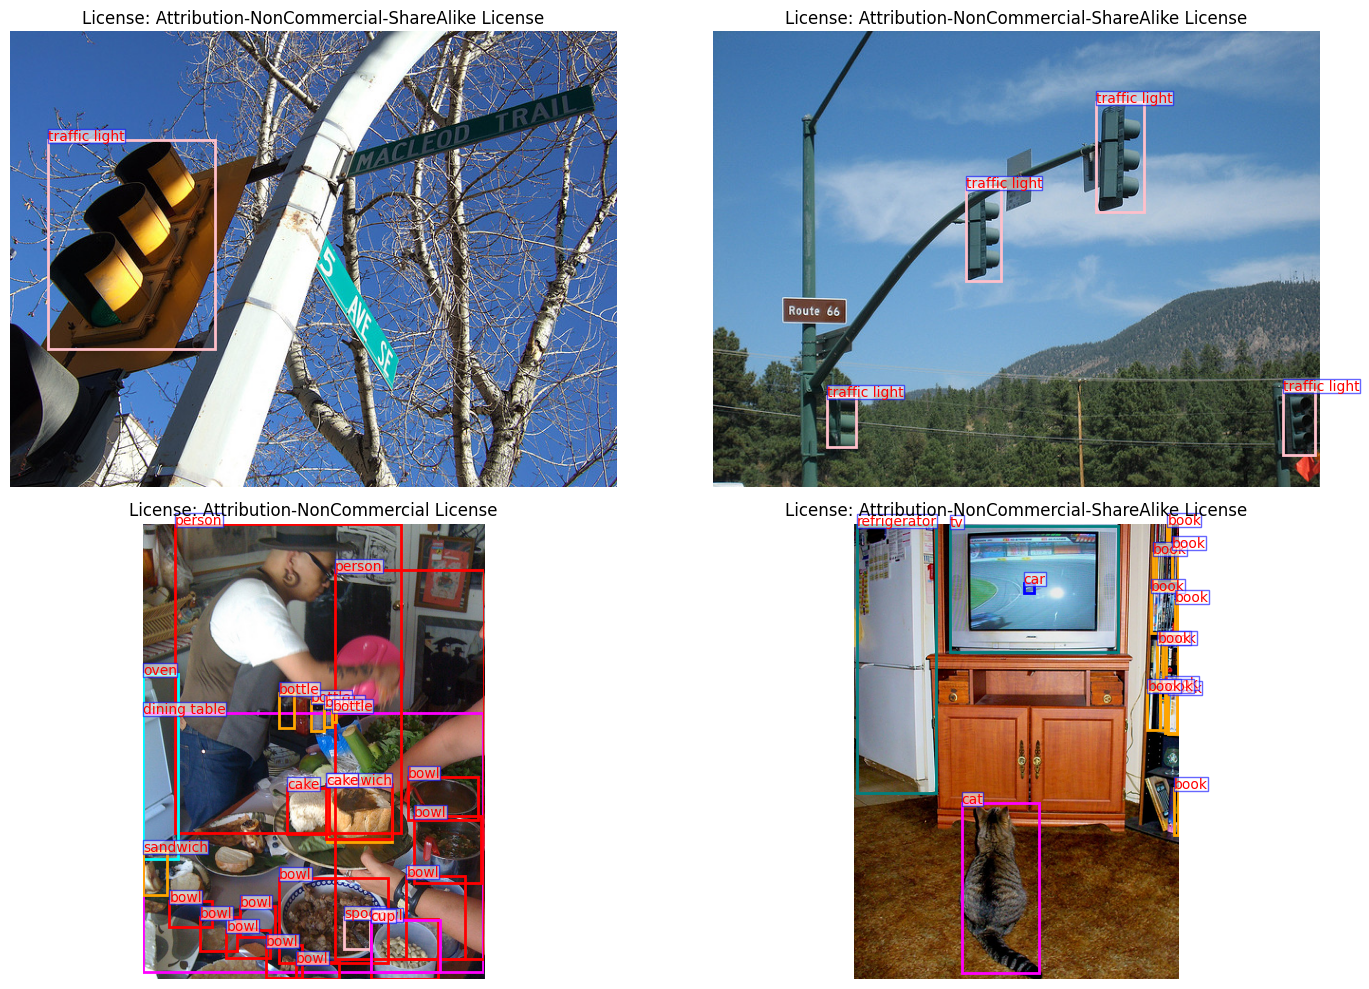

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# define a list of colors for drawing bounding boxes
color_list = ["pink", "red", "teal", "blue", "orange", "yellow", "black", "magenta","green","aqua"]*10

num_imgs_to_disp = 4
total_images = len(coco.get_imgIds()) # total number of images
sel_im_idxs = np.random.permutation(total_images)[:num_imgs_to_disp]

img_ids = coco.get_imgIds()
selected_img_ids = [img_ids[i] for i in sel_im_idxs]

ann_ids = coco.get_annIds(selected_img_ids)
im_licenses = coco.get_imgLicenses(selected_img_ids)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax = ax.ravel()

for i, im in enumerate(selected_img_ids):
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)
    for ann in annotations:
        bbox = ann['bbox']
        x, y, w, h = [int(b) for b in bbox]
        class_id = ann["category_id"]
        class_name = coco.load_cats(class_id)[0]["name"]
        license = coco.get_imgLicenses(im)[0]["name"]
        color_ = color_list[class_id]
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color_, facecolor='none')

        t_box=ax[i].text(x, y, class_name,  color='red', fontsize=10)
        t_box.set_bbox(dict(boxstyle='square, pad=0',facecolor='white', alpha=0.6, edgecolor='blue'))
        ax[i].add_patch(rect)
    

    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_xlabel('Longitude')
    ax[i].set_title(f"License: {license}")

plt.tight_layout()
plt.show()